# Week 6 - Machine Learning

Scikit-learn (sklearn) library imports:

- train_test_split --> splitting data into training and testing datasets
- KFold --> cross-validation (k - number of folds)
- GridSearchCV --> hyperparmaters tuning
- roc_auc_score --> Area under the curve for ROC
- plot_roc_curve --> Plotting ROC curve
- SVC --> Support Vector Machine
- MLPClassifier --> Multiple layer perceptron (Neural Network)
- classification_report --> performance metrics for classification
- confusion_matrix --> predicted vs actual values
- ConfusionMatrixDisplay --> visualization for confusion matrix

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import data

data = pd.read_csv("bank.csv")

# Create features/inputs
X = data.drop(columns = ["Class"])

# Create the output/class
y = data["Class"]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Variance,Skewness,Curtosis,Entropy,Class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


### Logistic Regression

#### Hyperparameters to tune:
- solver: [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
- penalty: [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
- C: [100, 10, 1.0, 0.1, 0.01]

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       300
           1       0.96      1.00      0.98       249

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549



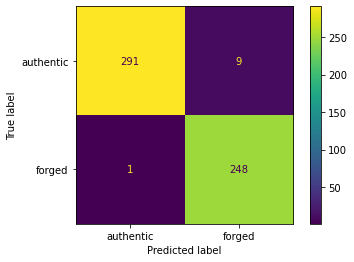

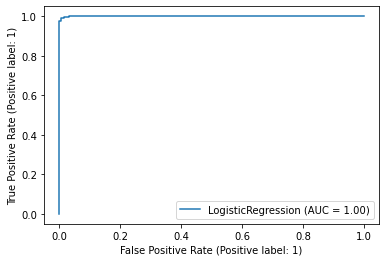

In [4]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["authentic", "forged"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

### Random forest

#### Hyperparameters to tune:
- max_features: [‘sqrt’, ‘log2’]
- n_estimators: [10, 100, 1000]
- max_depth

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       300
           1       0.98      0.98      0.98       249

    accuracy                           0.98       549
   macro avg       0.98      0.98      0.98       549
weighted avg       0.98      0.98      0.98       549



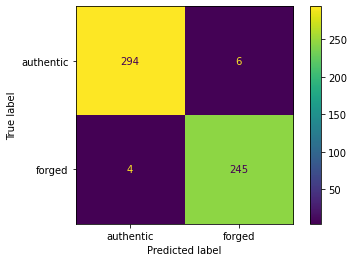

In [7]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

### Support Vector Machine

#### Hyperparameters to tune
- kernels: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
- C: [100, 10, 1.0, 0.1, 0.001]
- gamma: [100, 10, 1.0, 0.1]

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       249

    accuracy                           1.00       549
   macro avg       1.00      1.00      1.00       549
weighted avg       1.00      1.00      1.00       549



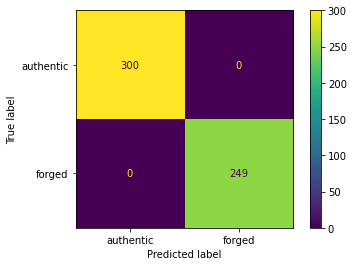

In [17]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))

### Neural Network

#### Hyperparameters to tune
- hidden_layer_sizes
- solver: [‘lbfgs’, ‘sgd’, ‘adam’]
- learning_rate: [‘constant’, ‘invscaling’, ‘adaptive’]
- learning_rate_init
- activation - [‘identity’, ‘logistic’, ‘tanh’, ‘relu’]


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       249

    accuracy                           1.00       549
   macro avg       1.00      1.00      1.00       549
weighted avg       1.00      1.00      1.00       549



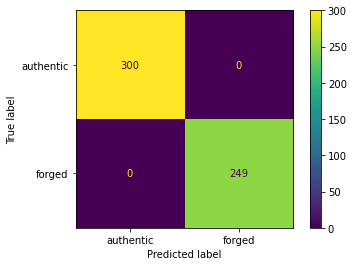

In [20]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))

In [23]:
# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.9879518072289156
Accuracy for iteration 3 is 1.0
Accuracy for iteration 4 is 0.975609756097561
Accuracy for iteration 5 is 0.9878048780487805
Accuracy for iteration 6 is 0.9634146341463414
Accuracy for iteration 7 is 0.9878048780487805
Accuracy for iteration 8 is 0.9634146341463414
Accuracy for iteration 9 is 0.9634146341463414
Accuracy for iteration 10 is 0.975609756097561


In [24]:
# Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}